In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/home/lagvna/WykazCzasopism/resources/wykaz.csv")

/home/lagvna/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Unnamed: 0,Wykaz czasopism naukowych,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,archeologia,filozofia,...,prawo kanoniczne,psychologia,astronomia,informatyka,matematyka,nauki biologiczne,nauki chemiczne,nauki fizyczne,nauki o Ziemi i środowisku,nauki teologiczne
2,Lp.,Tytuł 1,issn,e-issn,Tytuł 2,issn,e-issn,Punkty,101,102,...,510,511,601,602,603,604,605,606,607,701
3,1,2D Materials,2053-1583,2053-1583,2D Materials,NaN,2053-1583,140,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,x,x,NaN,NaN
4,2,3 Biotech,2190-572X,2190-5738,3 Biotech,2190-572X,2190-5738,70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN


In [4]:
df.columns = df.iloc[2]

In [5]:
df.drop([0, 1, 2], inplace = True)

In [6]:
df = df[['Tytuł 1', 'Punkty']]

In [7]:
df['Punkty'].nunique()
df['Punkty'] = pd.to_numeric(df['Punkty'])
df['Punkty'] = df['Punkty'] / 10.0

In [8]:
df.head()

2,Tytuł 1,Punkty
3,2D Materials,14.0
4,3 Biotech,7.0
5,3C Empresa,2.0
6,3c Tecnologia,2.0
7,3C Tic,2.0


In [9]:
length = len(df)
midpoint = int(0.7 * length)

In [10]:
df.reindex(np.random.permutation(df.index))
train = df[:midpoint]
test = df[midpoint:]

In [11]:
from tensorflow.keras.utils import to_categorical

training_sentences = [i for i in train['Tytuł 1']]
testing_sentences = [i for i in test['Tytuł 1']]
training_labels = [int(i) for i in train['Punkty']]
testing_labels = [int(i) for i in test['Punkty']]

training_labels = training_labels
testing_labels = testing_labels


training_labels_final = to_categorical(training_labels)
testing_labels_final = to_categorical(testing_labels)

In [12]:
vocab_size = 13000
embedding_dim = 16
max_length = 20
trunc_type='post'
oov_tok = "<OOV>"

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(21, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 16)            208000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 12)                780       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 21)                273       
Total params: 218,809
Trainable params: 218,809
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
636/636 [==============================] - 8s 12ms/step - loss: 1.7835 - accuracy: 0.2265 - val_loss: 1.4226 - val_accuracy: 0.2871
Epoch 2/50
636/636 [==============================] - 7s 11ms/step - loss: 1.5708 - accuracy: 0.2971 - val_loss: 1.4655 - val_accuracy: 0.2996
Epoch 3/50
636/636 [==============================] - 8s 12ms/step - loss: 1.4531 - accuracy: 0.3733 - val_loss: 1.5855 - val_accuracy: 0.3399
Epoch 4/50
636/636 [==============================] - 10s 15ms/step - loss: 1.3519 - accuracy: 0.4373 - val_loss: 1.5263 - val_accuracy: 0.3506
Epoch 5/50
636/636 [==============================] - 8s 13ms/step - loss: 1.2718 - accuracy: 0.4776 - val_loss: 1.6792 - val_accuracy: 0.3168
Epoch 6/50
636/636 [==============================] - 9s 14ms/step - loss: 1.2048 - accuracy: 0.5183 - val_loss: 1.7329 - val_accuracy: 0.2666
Epoch 7/50
636/636 [==============================] - 10s 15ms/step - loss: 1.1452 - accuracy: 0.5466 - val_loss: 1.9075 - val_accuracy: 0.22

In [16]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

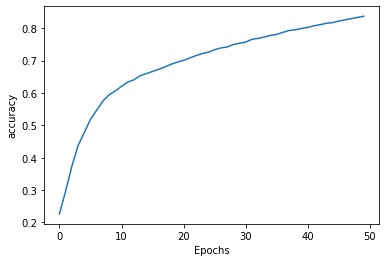

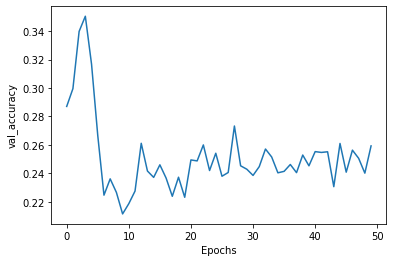

In [17]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'val_accuracy')

In [18]:
title = 'distributed computing'
token_list = tokenizer.texts_to_sequences([title])[0]
token_list = pad_sequences([token_list], maxlen=max_length-1, padding='post')
predicted = model.predict_classes(token_list, verbose=0)

print(predicted)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[7]
